In [ ]:
# code shared by Jennifer Thomas

# Spatial Data Basics with sf in R (Part 3)

This jupyter notebook contains the code and documentation for part 3 of the "Spatial Data Basics with sf in R" workshop with R-Ladies RTP.

All of the code that was used to create this tutorial can be found on GitHub here: https://github.com/sheilasaia/sf-workshop-rladies. Please contact Sheila Saia via Meetup or in the Zoom chat during the workshop, if you have any questions.

Special thanks to Dallas Hoffman for all their feedback and help with running this multi-part workshop!

## Learning Outcomes

By the end of part 3 of the workshop attendees will be able to:

1. **apply** sf and tidyverse operations to wrangle and map real-world spatial data

Meetup page for Part 3: https://www.meetup.com/rladies-rtp/events/286866014/

To start, load the `tidyverse`, `sf`, and `here` R packages.

In [1]:
# load the libraries
# add your code here
library(tidyverse)
library(here)
library(sf)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

here() starts at /home/jovyan

Linking to GEOS 3.6.2, GDAL 2.2.3, PROJ 4.9.3; sf_use_s2() is TRUE



## Real-World Spatial Data

There were several spatial datasets that we've worked with so far (that are located in the data director of this project).

Some data we've already worked with:

- Southeastern state bounds
- North Carolina bounds
- North Carolina median income
- North Carolina USGS streamflow gauges

Some other data that might be of interest
- North Carolina non-reference watersheds (spatial, in data directory) - NOTE: non-reference watersheds have some urban/residential/commercial development versus reference watersheds which are largely undeveloped
- North Carolina watershed characteristics (tabular, in data directory)
- North Carolina USGS streamflow gauges time series data (tabular, not in data directory but can use `dataRetrieval` package in R and gage id's from existing data)
- Other North Carolina Census data (tabular and spatial, not in data directory but can use `tidycensus` package in R *with a Census API key*)

## Spatial Operations Practice Ideas

Try out some of the other spatial operations. Here are some ideas:

1. What is the area of each county?
2. What is the centroid of each non-reference watershed. Map the watersheds and these centroids together on one image.
3. Buffer each gage by 5 km and map the result.
4. Create a map of the number of gages per county (and plot the number of gauges vs median county income).
5. Find the minimum area that contains all the gages. What fraction of the total area of NC is this?
6. Find the centroid of each county and map the result along with the county bounds.
7. What other things would you like to try?

## Other Helpful sf Commands

If you have a spatial dataset and you want to just keep the attribute data, that is, the data that is not spatially oriented, you can use `st_drop_geometry()` and you will just be left with the dataframe. If you only want to keep the geometry and want to drop all the attribute data you can use `st_geometry()`.

In [2]:
nc_gages <- read_csv(here::here("data", "streamgages", "nc_gages.csv"), col_names = TRUE)

Rows: 272 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (8): STAID, STANAME, CLASS, AGGECOREGI, HUC02, STATE, HCDN_2009, ACTIVE09
dbl (6): DRAIN_SQKM, LAT_GAGE, LNG_GAGE, FLYRS1900, FLYRS1950, FLYRS1990

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [5]:
nc_gages <- read_sf(here::here("data", "streamgages", "nc_gages.shp"))

In [7]:
glimpse(nc_gages)

Rows: 272
Columns: 15
$ STAID      <chr> "0204382800", "02053200", "02053500", "02068500", "02069000…
$ STANAME    <chr> "PASQUOTANK RIVER NEAR SOUTH MILLS, NC", "POTECASI CREEK NE…
$ CLASS      <chr> "Ref", "Ref", "Non-ref", "Non-ref", "Non-ref", "Ref", "Non-…
$ AGGECOREGI <chr> "SECstPlain", "SECstPlain", "SECstPlain", "EastHghlnds", "S…
$ DRAIN_SQKM <dbl> 160.78410, 583.65990, 165.88350, 321.67890, 1280.29200, 672…
$ HUC02      <chr> "03", "03", "03", "03", "03", "03", "03", "03", "03", "03",…
$ LAT_GAGE   <dbl> 36.42139, 36.37083, 36.28028, 36.51500, 36.31930, 36.53389,…
$ LNG_GAGE   <dbl> -76.34250, -77.02556, -76.99944, -80.30306, -80.05004, -79.…
$ STATE      <chr> "NC", "NC", "NC", "NC", "NC", "NC", "NC", "NC", "NC", "NC",…
$ HCDN_2009  <chr> NA, "yes", NA, NA, NA, NA, NA, NA, "yes", NA, NA, NA, "yes"…
$ ACTIVE09   <chr> "yes", "yes", "yes", "yes", "yes", "yes", "yes", "yes", "ye…
$ FLYRS1900  <dbl> 2, 51, 59, 78, 6, 58, 69, 70, 45, 36, 32, 96, 22, 70, 36, 4…
$ FLYRS1950  <dbl>

In [10]:
st_crs(nc_gages)

Coordinate Reference System:
  User input: EPSG:5070 
  wkt:
PROJCS["NAD83 / Conus Albers",
    GEOGCS["NAD83",
        DATUM["North_American_Datum_1983",
            SPHEROID["GRS 1980",6378137,298.257222101,
                AUTHORITY["EPSG","7019"]],
            TOWGS84[0,0,0,0,0,0,0],
            AUTHORITY["EPSG","6269"]],
        PRIMEM["Greenwich",0,
            AUTHORITY["EPSG","8901"]],
        UNIT["degree",0.0174532925199433,
            AUTHORITY["EPSG","9122"]],
        AUTHORITY["EPSG","4269"]],
    PROJECTION["Albers_Conic_Equal_Area"],
    PARAMETER["standard_parallel_1",29.5],
    PARAMETER["standard_parallel_2",45.5],
    PARAMETER["latitude_of_center",23],
    PARAMETER["longitude_of_center",-96],
    PARAMETER["false_easting",0],
    PARAMETER["false_northing",0],
    UNIT["metre",1,
        AUTHORITY["EPSG","9001"]],
    AXIS["X",EAST],
    AXIS["Y",NORTH],
    AUTHORITY["EPSG","5070"]]

In [9]:
nc_gages <- nc_gages %>% st_set_crs(5070)

In [18]:
nc_gages_buffers <- nc_gages %>% st_buffer(dist = 20000)

In [13]:
glimpse(nc_gages_buffers)

Rows: 272
Columns: 15
$ STAID      <chr> "0204382800", "02053200", "02053500", "02068500", "02069000…
$ STANAME    <chr> "PASQUOTANK RIVER NEAR SOUTH MILLS, NC", "POTECASI CREEK NE…
$ CLASS      <chr> "Ref", "Ref", "Non-ref", "Non-ref", "Non-ref", "Ref", "Non-…
$ AGGECOREGI <chr> "SECstPlain", "SECstPlain", "SECstPlain", "EastHghlnds", "S…
$ DRAIN_SQKM <dbl> 160.78410, 583.65990, 165.88350, 321.67890, 1280.29200, 672…
$ HUC02      <chr> "03", "03", "03", "03", "03", "03", "03", "03", "03", "03",…
$ LAT_GAGE   <dbl> 36.42139, 36.37083, 36.28028, 36.51500, 36.31930, 36.53389,…
$ LNG_GAGE   <dbl> -76.34250, -77.02556, -76.99944, -80.30306, -80.05004, -79.…
$ STATE      <chr> "NC", "NC", "NC", "NC", "NC", "NC", "NC", "NC", "NC", "NC",…
$ HCDN_2009  <chr> NA, "yes", NA, NA, NA, NA, NA, NA, "yes", NA, NA, NA, "yes"…
$ ACTIVE09   <chr> "yes", "yes", "yes", "yes", "yes", "yes", "yes", "yes", "ye…
$ FLYRS1900  <dbl> 2, 51, 59, 78, 6, 58, 69, 70, 45, 36, 32, 96, 22, 70, 36, 4…
$ FLYRS1950  <dbl>

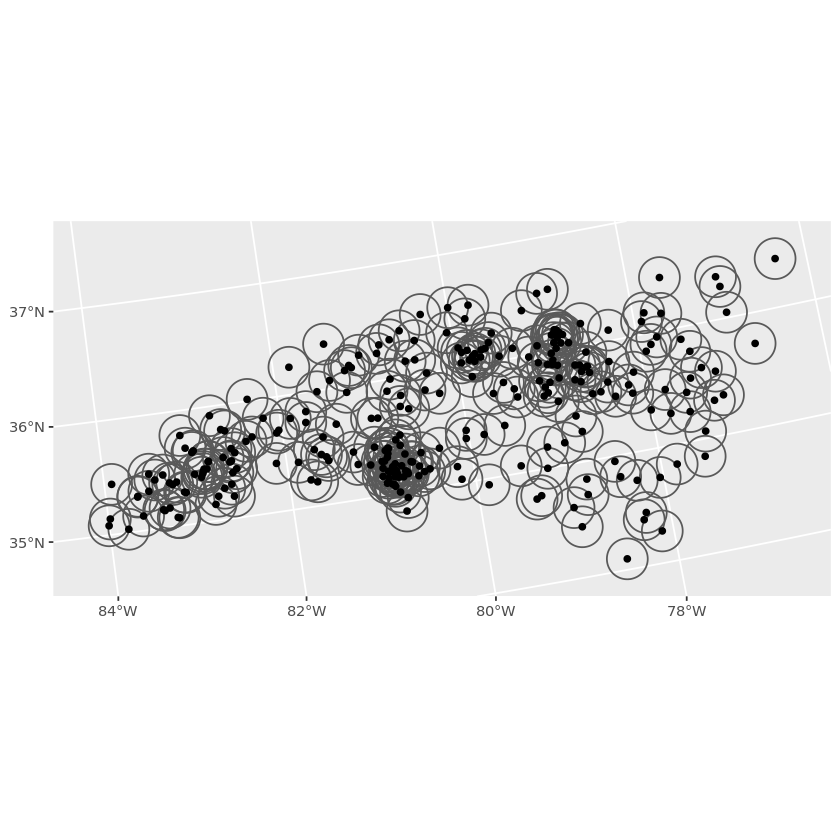

In [20]:
## what we did before
## ggplot() + geom_sf(data = nc_county_income, fill = NA) +
##  geom_sf(data = nc_gages_income_join, aes(color = est))


ggplot() + geom_sf(data = nc_gages_buffers, fill = NA) +
        geom_sf(data = nc_gages)



In [21]:
nc_county <- read_sf(here::here("data", "nc_county_income", "nc_county_income.shp"))

In [22]:
glimpse(nc_county)

Rows: 100
Columns: 6
$ GEOID    <chr> "37007", "37027", "37039", "37049", "37055", "37059", "37069"…
$ NAME     <chr> "Anson County", "Caldwell County", "Cherokee County", "Craven…
$ var      <chr> "med_income", "med_income", "med_income", "med_income", "med_…
$ est      <dbl> 39126, 42072, 40294, 50870, 58012, 57611, 53175, 34251, 37005…
$ moe      <dbl> 3577, 1519, 2205, 1421, 2668, 2774, 2666, 1435, 3646, 2214, 2…
$ geometry <MULTIPOLYGON [m]> MULTIPOLYGON (((1415473 143..., MULTIPOLYGON (((…


In [27]:
st_crs(nc_county)

Coordinate Reference System:
  User input: EPSG:5070 
  wkt:
PROJCS["NAD83 / Conus Albers",
    GEOGCS["NAD83",
        DATUM["North_American_Datum_1983",
            SPHEROID["GRS 1980",6378137,298.257222101,
                AUTHORITY["EPSG","7019"]],
            TOWGS84[0,0,0,0,0,0,0],
            AUTHORITY["EPSG","6269"]],
        PRIMEM["Greenwich",0,
            AUTHORITY["EPSG","8901"]],
        UNIT["degree",0.0174532925199433,
            AUTHORITY["EPSG","9122"]],
        AUTHORITY["EPSG","4269"]],
    PROJECTION["Albers_Conic_Equal_Area"],
    PARAMETER["standard_parallel_1",29.5],
    PARAMETER["standard_parallel_2",45.5],
    PARAMETER["latitude_of_center",23],
    PARAMETER["longitude_of_center",-96],
    PARAMETER["false_easting",0],
    PARAMETER["false_northing",0],
    UNIT["metre",1,
        AUTHORITY["EPSG","9001"]],
    AXIS["X",EAST],
    AXIS["Y",NORTH],
    AUTHORITY["EPSG","5070"]]

In [26]:
nc_county <- nc_county %>% st_set_crs(5070)

In [30]:
nc_county_join <- nc_county %>% st_intersection(nc_gages)

Warning message:
“attribute variables are assumed to be spatially constant throughout all geometries”


In [31]:
glimpse(nc_county_join)

Rows: 271
Columns: 20
$ GEOID      <chr> "37139", "37091", "37091", "37169", "37169", "37157", "3715…
$ NAME       <chr> "Pasquotank County", "Hertford County", "Hertford County", …
$ var        <chr> "med_income", "med_income", "med_income", "med_income", "me…
$ est        <dbl> 48279, 37005, 37005, 46169, 46169, 42490, 42490, 42490, 439…
$ moe        <dbl> 1414, 3646, 3646, 2190, 2190, 1658, 1658, 1658, 2480, 2286,…
$ STAID      <chr> "0204382800", "02053200", "02053500", "02068500", "02069000…
$ STANAME    <chr> "PASQUOTANK RIVER NEAR SOUTH MILLS, NC", "POTECASI CREEK NE…
$ CLASS      <chr> "Ref", "Ref", "Non-ref", "Non-ref", "Non-ref", "Ref", "Non-…
$ AGGECOREGI <chr> "SECstPlain", "SECstPlain", "SECstPlain", "EastHghlnds", "S…
$ DRAIN_SQKM <dbl> 160.78410, 583.65990, 165.88350, 321.67890, 1280.29200, 672…
$ HUC02      <chr> "03", "03", "03", "03", "03", "03", "03", "03", "03", "03",…
$ LAT_GAGE   <dbl> 36.42139, 36.37083, 36.28028, 36.51500, 36.31930, 36.53389,…
$ LNG_GAGE   <dbl>

In [62]:
nc_county_count <- nc_county_join %>%
     st_drop_geometry() %>%
     group_by(NAME) %>% 
     summarize(county_count = n())

In [35]:
head(nc_county_count)

NAME,county_count
<chr>,<int>
Alamance County,2
Alexander County,1
Anson County,1
Ashe County,1
Bertie County,1
Bladen County,3


In [63]:
nc_county_count <- left_join(nc_county, nc_county_count, by = "NAME")

In [54]:
install.packages("viridis")

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)

also installing the dependency ‘gridExtra’




In [55]:
library(viridis)

Loading required package: viridisLite



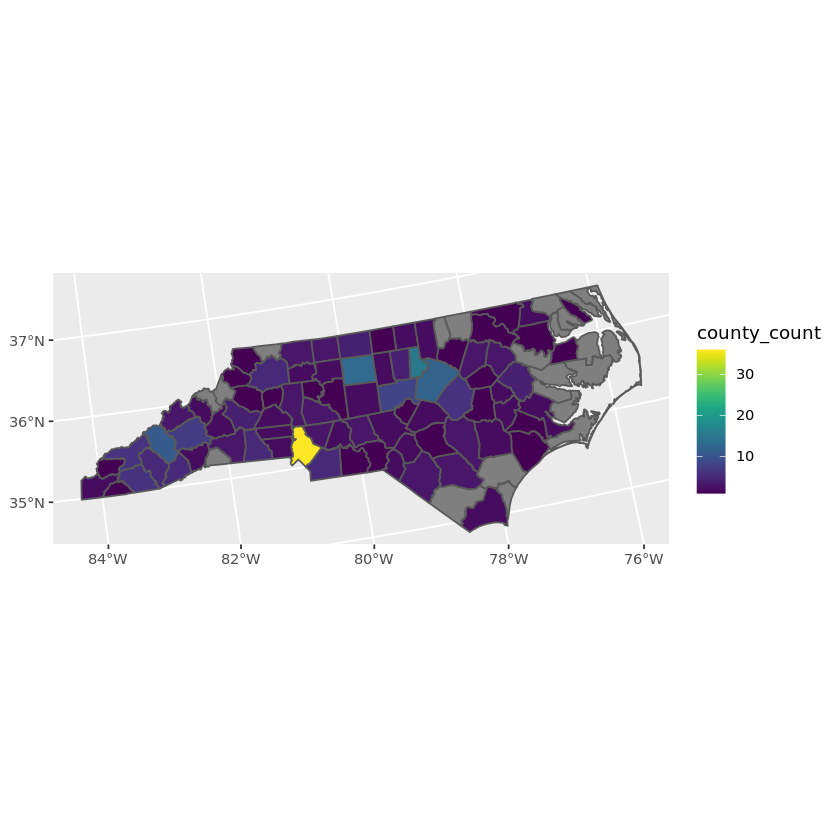

In [64]:
ggplot() + 
geom_sf(data = nc_county_count, aes(geometry = geometry, fill = county_count)) +
scale_fill_viridis()